#REGRESSION

In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [63]:
pip install --upgrade certifi

In [64]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [65]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)    #  we get all rows and corresonding coumn names od california data set.
df['Target'] = data.target                                  # Add target column  from "data.target" to our new dataframe as an target column to train and test the machine..
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [68]:
print(df.isnull().sum())                                                          # checking null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


#checking correlation for doing feature selection

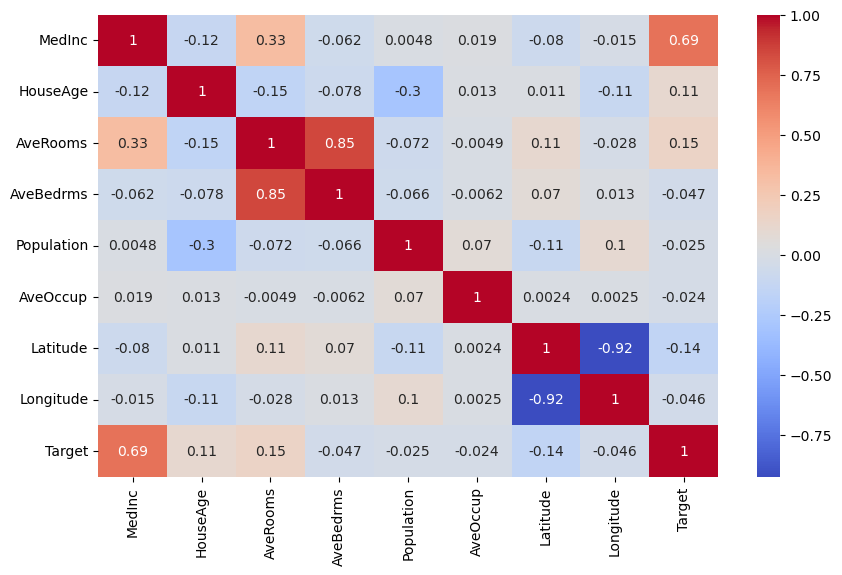

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation between all features and the target
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#selecting only features that have a strong correlation with Target.

In [87]:
X = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['Target']  # target remains the same

#splitting for training and testing .

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling

In [89]:
from sklearn.preprocessing import StandardScaler
featurescaler = StandardScaler()
X_train_scaled =featurescaler.fit_transform(X_train)    # Learning scaling from training data.
X_test_scaled = featurescaler.transform(X_test)         # Applying the same scaling to test data.

# linear regression

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

#visualisation

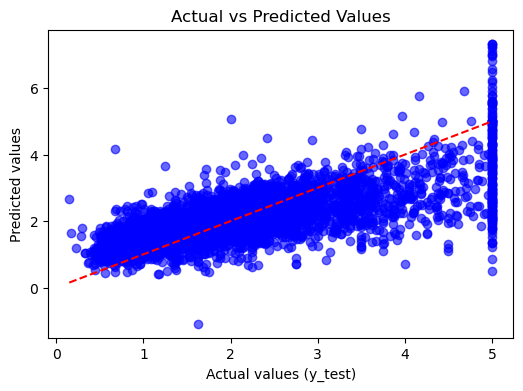

In [91]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # prediction line
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()


#Evaluation mertics.

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"R squared Score (R^2): {RSquared :.4f}")

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.6589
Mean Absolute Error (MAE): 0.6033
R squared Score (R^2): 0.4972


Model's predications are not much better than the default prediction values,that is the mean of y_test values..that means this models is not stronger.The diffrence between y_test and y_pred are much bigger than the differnce between y_test and it's mean .

# Decision tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
y_pred_DT = DT_model.predict(X_test_scaled)

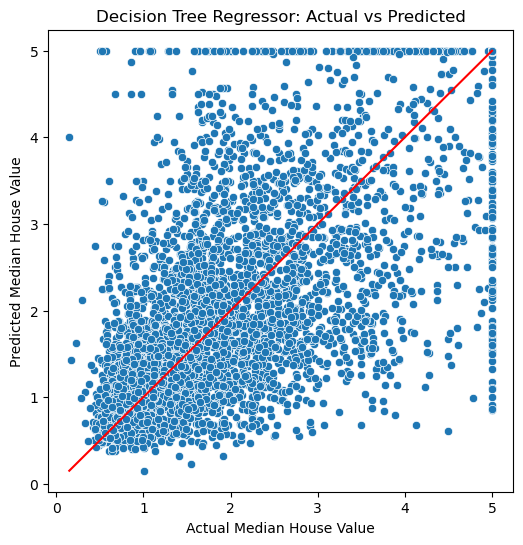

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_DT)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSC_DT = mean_squared_error(y_test, y_pred_DT)
MAE_DT = mean_absolute_error(y_test, y_pred_DT)
R2_DT = r2_score(y_test, y_pred_DT)

print("Decision Tree Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSC_DT, 4))
print("Mean Absolute Error (MAE):", round(MAE_DT, 4))
print("R squared Score (R^2):", round(R2_DT, 4))

Decision Tree Regressor Evaluation:
Mean Squared Error (MSE): 1.1061
Mean Absolute Error (MAE): 0.7538
R squared Score (R^2): 0.1559


Models predications are not much better than the default prediction values,that is the mean of y_test values..that means this models is not stronger.The diffrence between y_test and y_pred are much bigger than the differnce between y_test and  it's mean . It has very low r square values that measn this model is weaker than liner regression.

# Random forest

In [97]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train_scaled, y_train)

y_pred_RF = RF_model.predict(X_test_scaled)

MSE_RF = mean_squared_error(y_test, y_pred_RF)
MAE_RF = mean_absolute_error(y_test, y_pred_RF)
RSquare_RF = r2_score(y_test,y_pred_RF)

print("Random Forest Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_RF, 4))
print("Mean Absolute Error (MAE):", round(MAE_RF, 4))
print("R-squared Score (R²):", round(RSquare_RF, 4))

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.5977
Mean Absolute Error (MAE): 0.5606
R-squared Score (R²): 0.5439


Predictions are much better than Decision tree model and Linear regression.

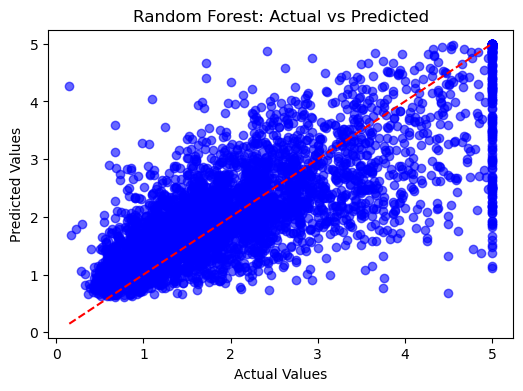

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_RF, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# gradient booster.

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

GBR_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBR_model.fit(X_train_scaled, y_train)

y_pred_GBR = GBR_model.predict(X_test_scaled)

MSE_GBR = mean_squared_error(y_test, y_pred_GBR)
MAE_GBR = mean_absolute_error(y_test, y_pred_GBR)
RSquare_GBR = r2_score(y_test, y_pred_GBR)

print("Gradient Boosting Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_GBR, 4))
print("Mean Absolute Error (MAE):", round(MAE_GBR, 4))
print("R-squared Score (R²):", round(RSquare_GBR, 4))

Gradient Boosting Regressor Evaluation:
Mean Squared Error (MSE): 0.5538
Mean Absolute Error (MAE): 0.5347
R-squared Score (R²): 0.5774


Predictions are much better than Random Forest,Decision tree model and Linear regression with high r squared value(coefficent of determination)..

C:\Users\SR\AppData\Local\Temp\ipykernel_9492\3967541557.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')  # Perfect prediction line


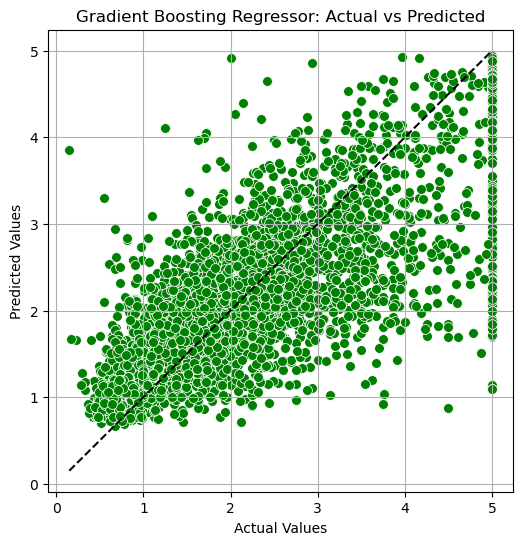

In [100]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_GBR , color='green', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

# support vector.

In [101]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
SVR_model.fit(X_train_scaled, y_train)

y_pred_SVR = svr_model.predict(X_test_scaled)

MSE_SVR = mean_squared_error(y_test, y_pred_SVR)
MAE_SVR = mean_absolute_error(y_test,y_pred_SVR)
RSquare_SVR = r2_score(y_test, y_pred_SVR)

print("Support Vector Regressor (SVR) Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_SVR, 4))
print("Mean Absolute Error (MAE):", round(MAE_SVR, 4))
print("R-squared Score (R²):", round(RSquare_SVR, 4))

Support Vector Regressor (SVR) Evaluation:
Mean Squared Error (MSE): 0.5705
Mean Absolute Error (MAE): 0.5207
R-squared Score (R²): 0.5647


Low MSE,MASE and high r sqaured value,but predications are not stronger than Gradient booster..

C:\Users\SR\AppData\Local\Temp\ipykernel_9492\3648939289.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


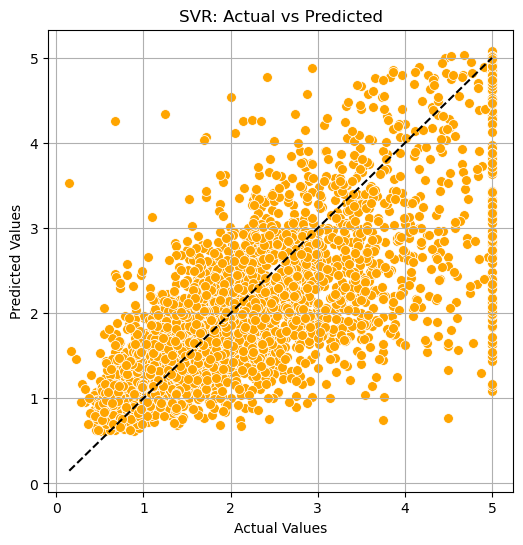

In [102]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_SVR, color='orange', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

# model comparison.

In [104]:
print("\nModel Comparison (R² Scores):")
print("Linear Regression:", round(RSquared, 4))
print("decision tree:", round(R2_DT, 4))
print("Random Forest:", round(RSquare_RF, 4))
print("Gradient Boosting:", round(RSquare_GBR, 4))
print("SVR:", round(RSquare_SVR, 4))


Model Comparison (R² Scores):
Linear Regression: 0.4972
decision tree: 0.1559
Random Forest: 0.5439
Gradient Boosting: 0.5774
SVR: 0.5647


Based on (coeffient of determaiantion ) and other mertics evaluation scores, Gradient Boosting is the best  model for machine training and prediction,then next place goes to SVR ,then Random forest.The worst model is decision tree.
so to deal  with this complex and non liner data set Gradient Boosting,SVR,Random Forest are best choices with low metrics values(MSE,MAE) ans best R squared score(close to 1).